<a href="https://colab.research.google.com/github/zyberg2091/CV-tutorials/blob/master/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
import pandas as pd


from tensorflow.keras.layers import Input,Dense,Dropout,Flatten
from tensorflow.keras.models import Model


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 321M/330M [00:15<00:00, 15.8MB/s]
100% 330M/330M [00:15<00:00, 22.8MB/s]


In [ ]:
!unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('Face Mask Dataset/Train',target_size=(224, 224),shuffle=True,class_mode="binary",batch_size=64)
validation_generator= validation_datagen.flow_from_directory('Face Mask Dataset/Validation',target_size=(224, 224),shuffle=True,class_mode="binary",batch_size=64)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
x,y=next(train_generator)

In [ ]:
y[:10]

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 0.], dtype=float32)

0


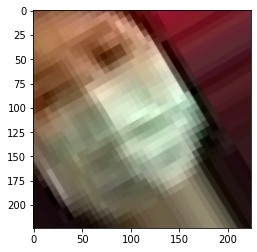

0


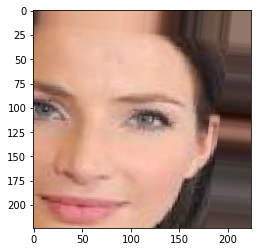

0


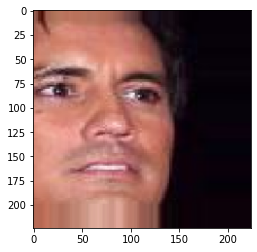

0


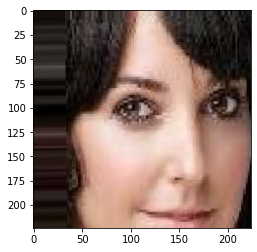

0


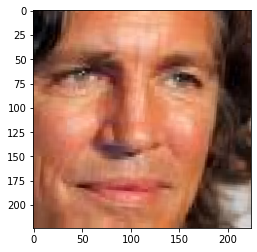

0


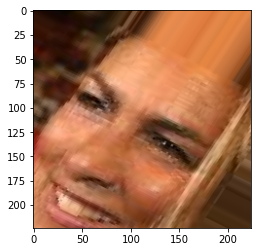

0


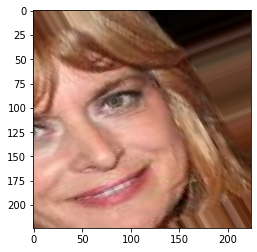

0


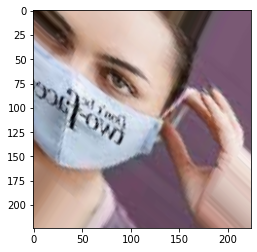

0


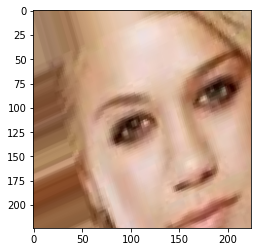

0


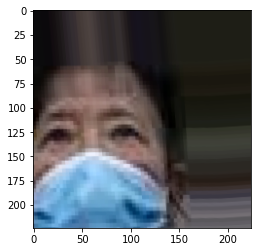

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
 print(y[i].argmax(-1))
 plt.imshow(x[i])
 plt.show()
 

In [ ]:
X_train, y_train = next(train_generator)

In [ ]:
X_train.shape

(64, 224, 224, 3)

In [ ]:
base_model=tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False)
base_model.output

58892288/58889256 [==============================] - 2s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in base_model.layers:
	layer.trainable=False

print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Model

last_layer=base_model.output
x=Flatten()(last_layer)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(inputs=base_model.input,outputs=x)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='mask_detect.h5',save_best_only=True,monitor='accuracy')

model.fit(train_generator,steps_per_epoch=train_generator.samples//64,validation_data=validation_generator,callbacks=[model_checkpoint],epochs=10)

Epoch 1/10
156/156 [==============================] - 166s 991ms/step - loss: 0.4988 - accuracy: 0.8756 - val_loss: 0.0374 - val_accuracy: 0.9850
Epoch 2/10
156/156 [==============================] - 150s 958ms/step - loss: 0.0765 - accuracy: 0.9713 - val_loss: 0.0218 - val_accuracy: 0.9912
Epoch 3/10
156/156 [==============================] - 150s 961ms/step - loss: 0.0780 - accuracy: 0.9723 - val_loss: 0.0709 - val_accuracy: 0.9737
Epoch 4/10
156/156 [==============================] - 149s 956ms/step - loss: 0.0854 - accuracy: 0.9683 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 5/10
156/156 [==============================] - 149s 955ms/step - loss: 0.0586 - accuracy: 0.9804 - val_loss: 0.0451 - val_accuracy: 0.9837
Epoch 6/10
156/156 [==============================] - 150s 957ms/step - loss: 0.0572 - accuracy: 0.9813 - val_loss: 0.0189 - val_accuracy: 0.9937
Epoch 7/10
156/156 [==============================] - 149s 955ms/step - loss: 0.0492 - accuracy: 0.9816 - val_loss: 0.0194 -

In [ ]:
!pip install opencv-python

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import cv2
from face_detect import detection
from google.colab.patches import cv2_imshow

def test(img):

    imge=load_img(os.path.join(img),target_size = (224,224,3))
    img_array=img_to_array(imge)
    img_array=img_array.reshape(1,224,224,3)
    pred=model.predict(img_array)
    return pred

def detection(img,gray):
    # for face detection
    facemodel = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    faces=facemodel.detectMultiScale(gray, 1.01,5)
    if(len(faces)>0):
        print("Found {} faces".format(str(len(faces))))
    for (x, y, w, h )in faces:
      if pred==0:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
        cv2.putText(img,'Mask',(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1)
      else:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
        cv2.putText(img,'NO Mask',(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1)


    return img

def show(img,pred):
    image=cv2.imread(img)
    gimage= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image=detection(image,gimage)
    cv2_imshow(image)
    print(image.shape)
      

    




In [ ]:
img='/content/66.png'
pred=test(img)
pred

array([[0.]], dtype=float32)

Found 1 faces


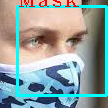

(108, 108, 3)


In [ ]:
show(img,pred.round())